In [1]:
import numpy as np           
import pandas as pd           
import matplotlib.pyplot as plt                   
import seaborn as sns
import sys
import os
# Add the parent directory to the Python path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
import google_drive as gd
from build_pipeline import build_pipeline

c:\Users\veron\Desktop\9th semester\MAL1\MAL1_Group_Assignemnt\assignment-7\prepare_dataset.py:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_net_migration['Country_Name'].replace({
c:\Users\veron\Desktop\9th semester\MAL1\MAL1_Group_Assignemnt\assignment-7\prepare_dataset.py:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

In [2]:
X_test, y_test, X_train, y_train, X_val, y_val = build_pipeline()

c:\Users\veron\Desktop\9th semester\MAL1\MAL1_Group_Assignemnt\assignment-7\prepare_dataset.py:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_net_migration['Country_Name'].replace({


In [10]:
X_train = X_train.drop(columns = 'Country_Name')
X_val = X_val.drop(columns = 'Country_Name')
X_test = X_test.drop(columns = 'Country_Name')

# Linear Regression

With the linear regression we want to predict the happiness score based on chosen features.

In [11]:
import pandas as pd
import numpy as np
from math import sqrt

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV, Lasso


## Oridnary Least-Squares Regression

In [12]:
# Train the model

ols = LinearRegression()

ols.fit(X_train, y_train)

ols.score(X_train, y_train)

0.7727102141021488

In [13]:
# Measure Model Performance
from sklearn.metrics import mean_squared_error, r2_score

y_val_pred = ols.predict(X_val)

# Calculate the RMSE and R^2 score for the validation set
print("Validation Metrics:")
print("R^2:", r2_score(y_val, y_val_pred))
print("RMSE:", sqrt(mean_squared_error(y_val, y_val_pred)))


Validation Metrics:
R^2: 0.7175967667755074
RMSE: 0.6333113869356928


OLS may be overfitting, so regularization is needed (Ridge/Lasso)

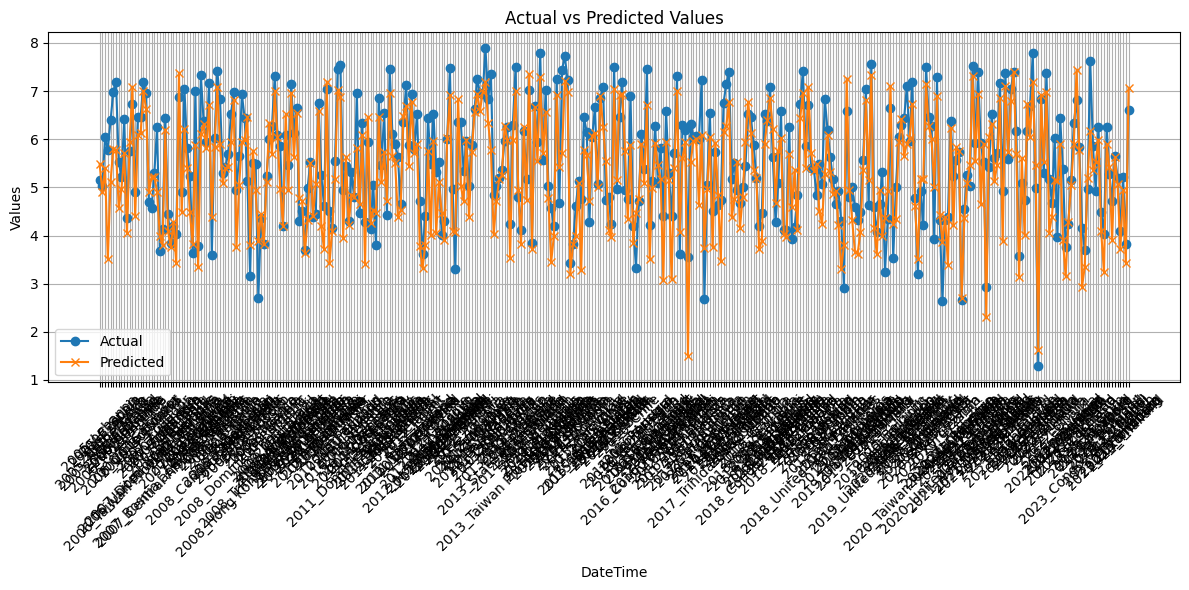

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
X_val.sort_values(by='Year', ascending=True, inplace=True)
# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(X_val.index, y_val, label='Actual', marker='o')
plt.plot(X_val.index, y_val_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Coefficient Evaluation

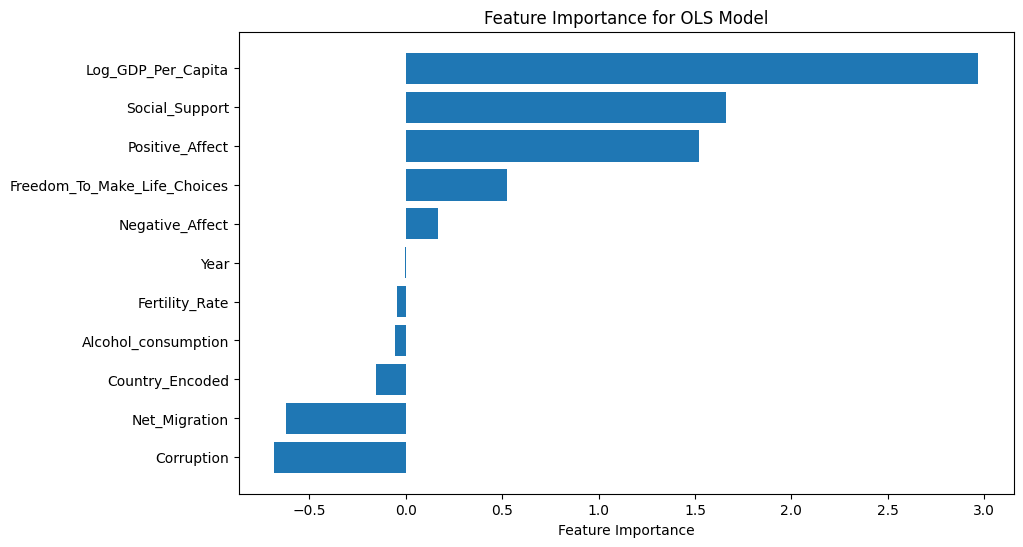

In [19]:

def plot_feature_importance(model, feature_names):
    importance = model.coef_
    sorted_idx = importance.argsort()
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), importance[sorted_idx], align="center")
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title("Feature Importance for OLS Model")
    plt.show()

plot_feature_importance(ols, X_train.columns)



Trying to drop the least important features to check if the model performs better. Fertility rate is highly correlated to the Log_GDP_Per_Capita (-0.81)

In [20]:
# Remove the least important features and train the model again
X_train_reduced = X_train.drop(columns=['Year', 'Fertility_Rate', 'Alcohol_consumption'])
X_val_reduced = X_val.drop(columns=['Year', 'Fertility_Rate', 'Alcohol_consumption'])

ols_reduced = LinearRegression()
ols_reduced.fit(X_train_reduced, y_train)
ols_reduced.score(X_train_reduced, y_train)


0.7725492692322683

In [21]:
# Measure Model Performance
y_val_pred_reduced = ols_reduced.predict(X_val_reduced)

# Calculate the RMSE and R^2 score for the validation set
print("Validation Metrics for Reduced Model:")
print("R^2:", r2_score(y_val, y_val_pred_reduced))
print("RMSE:", sqrt(mean_squared_error(y_val, y_val_pred_reduced)))


Validation Metrics for Reduced Model:
R^2: -0.9887352515308825
RMSE: 1.6806255061527569


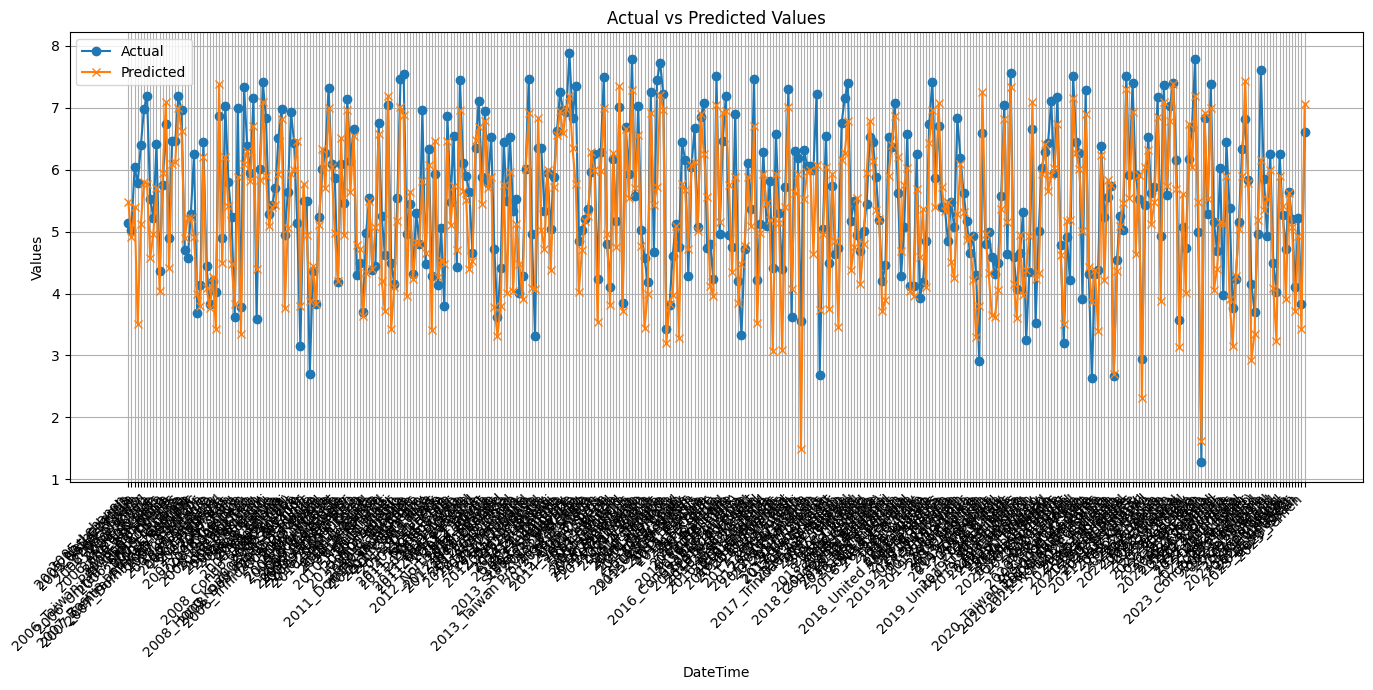

In [25]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
X_val.sort_values(by='Year', ascending=True, inplace=True)
# Plotting y_actual vs y_pred
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting
plt.figure(figsize=(14, 7))  # Larger figure
plt.plot(X_val.index, y_val, label='Actual', marker='o')
plt.plot(X_val.index, y_val_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('DateTime')
plt.ylabel('Values')



# Rotate labels, align them, and add padding
plt.xticks(rotation=45, ha='right')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


The model perform almost exactly the same, so dropping the features didn't help

# Ridge Regression


In [ ]:
# Find the optimal alpha value for Ridge regression
ridge_cv = RidgeCV(alphas= np.linspace(0.1, 1.0, 50), cv=5)
ridge_cv.fit(X_train, y_train)
ridge_cv.alpha_

In [ ]:
# Train the Ridge regression model with the optimal alpha value
ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train, y_train)

print("Ridge Train Score:", ridge.score(X_train, y_train))

In [ ]:
# Measure Model Performance

y_val_pred = ridge.predict(X_val)

# Calculate the RMSE and R^2 score for the validation and test sets
print("Validation Metrics:")
print("R^2:", r2_score(y_val, y_val_pred))
print("RMSE:", sqrt(mean_squared_error(y_val, y_val_pred)))

Ridge helped slightly with R^2 but not significantly

In [ ]:
# Plot the coefficients

plot_feature_importance(ridge, X_train.columns)


Recursive Feature Elimination for feature selection

In [ ]:
# Find the least important features using Recursive Feature Elimination
from sklearn.feature_selection import RFECV, RFE

# Perform Recursive Feature Elimination with Cross-Validation for best r2 score
rfe = RFECV(estimator=ridge, cv=5)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Transform the training and validation sets to include only the selected features
X_train_rfe = rfe.transform(X_train)
X_val_rfe = rfe.transform(X_val)


In [ ]:
# Train the model with the selected features
ridge_rfe = Ridge(alpha=ridge_cv.alpha_)
ridge_rfe.fit(X_train_rfe, y_train)

print("Ridge RFE Train Score:", ridge_rfe.score(X_train_rfe, y_train))

In [ ]:
# Measure Model Performance

y_val_pred = ridge_rfe.predict(X_val_rfe)

# Calculate the RMSE and R^2 score for the validation and test sets
print("Validation Metrics:")
print("R^2:", r2_score(y_val, y_val_pred))
print("RMSE:", sqrt(mean_squared_error(y_val, y_val_pred)))


Normal Ridge performs better.

## Lasso
Feature selection using lasso model

In [ ]:
# Find the optimal alpha value for Lasso regression
lasso_cv = LassoCV(alphas = np.linspace(0.01, 1.0, 50), cv=5)
lasso_cv.fit(X_train, y_train)
lasso_cv.alpha_

In [ ]:
# Train the Lasso regression model with the optimal alpha value

lasso = Lasso(alpha=lasso_cv.alpha_)

lasso.fit(X_train, y_train)

print("Non-zero coefficient:", sum(lasso.coef_ != 0))

print("Score on train set = ", format(lasso.score(X_train, y_train)))

In [ ]:
# Measure Model Performance

y_val_pred = lasso.predict(X_val)

# Calculate the RMSE and R^2 score for the validation and test sets
print("Validation Metrics:")
print("R^2:", r2_score(y_val, y_val_pred))
print("RMSE:", sqrt(mean_squared_error(y_val, y_val_pred)))

In [ ]:
# Plot the coefficients
plot_feature_importance(lasso, X_train.columns)


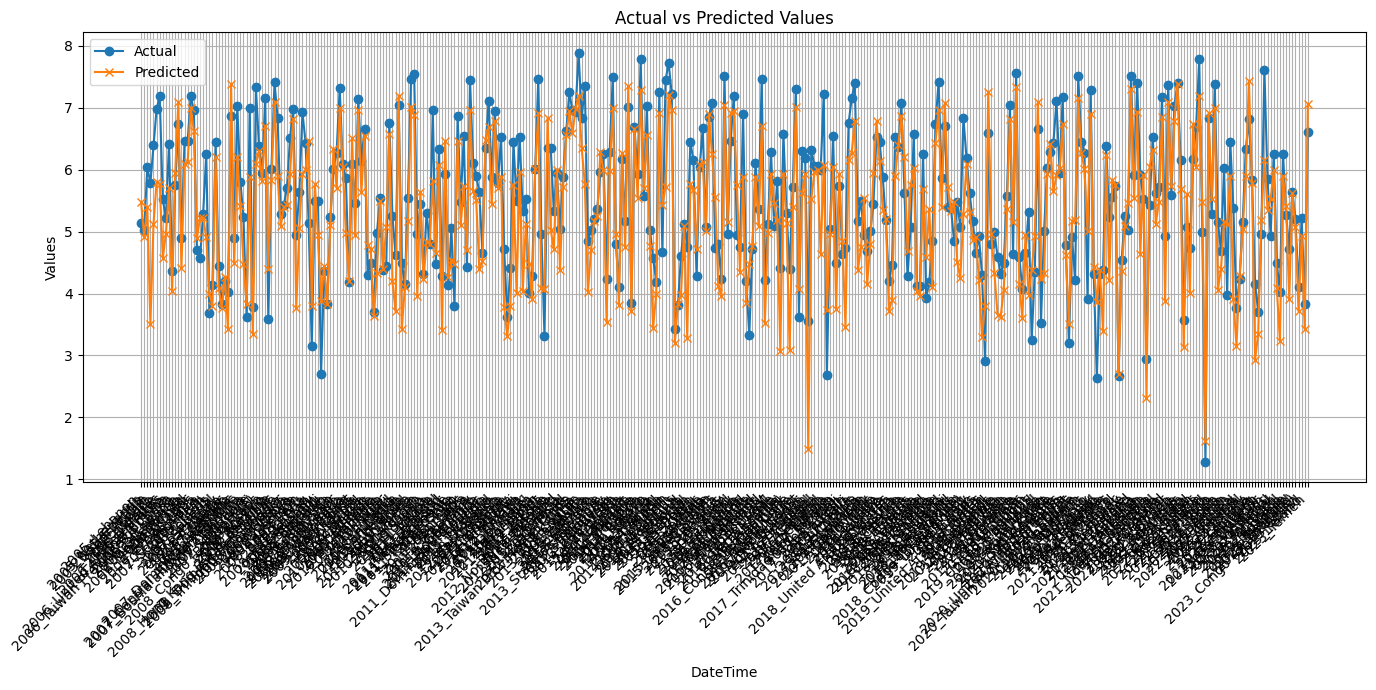

In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
X_val.sort_values(by='Year', ascending=True, inplace=True)
# Plotting
plt.figure(figsize=(14, 7))  # Larger figure
plt.plot(X_val.index, y_val, label='Actual', marker='o')
plt.plot(X_val.index, y_val_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate labels, align them, and add padding
plt.xticks(rotation=45, ha='right')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


# Polynomial 

In [ ]:
# Train the polynomial regression model
from sklearn.preprocessing import PolynomialFeatures


ols_poly = LinearRegression(fit_intercept=False)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

ols_poly.fit(X_train_poly, y_train)

ols_poly.score(X_train_poly, y_train)

In [ ]:
y_val_pred_poly = ols_poly.predict(poly.transform(X_val))

# Calculate the RMSE and R^2 score for the validation and test sets
print("Validation Metrics:")
print("R^2:", r2_score(y_val, y_val_pred_poly))
print("RMSE:", sqrt(mean_squared_error(y_val, y_val_pred_poly)))

### Compare OLS to Ridge and Polynomial

In [ ]:
# Test the models
ols_pred = ols.predict(X_test)
ridge_pred = ridge.predict(X_test)
poly_pred = ols_poly.predict(poly.transform(X_test))
ridge_rfe_pred = ridge_rfe.predict(rfe.transform(X_test))
lasso_pred = lasso.predict(X_test)

ols_rmse = sqrt(mean_squared_error(y_test, ols_pred))
ols_r2 = r2_score(y_test, ols_pred)

ridge_rmse = sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)

ridge_rfe_rmse = sqrt(mean_squared_error(y_test, ridge_rfe_pred))
ridge_rfe_r2 = r2_score(y_test, ridge_rfe_pred)

lasso_rmse = sqrt(mean_squared_error(y_test, lasso_pred))
lasso_r2 = r2_score(y_test, lasso_pred)

poly_rmse = sqrt(mean_squared_error(y_test, poly_pred))
poly_r2 = r2_score(y_test, poly_pred)


print("OLS RMSE:", ols_rmse)
print("OLS R^2:", ols_r2)
print("\nRidge RMSE:", ridge_rmse)
print("Ridge R^2:", ridge_r2)
print("\nRidge RFE RMSE:", ridge_rfe_rmse)
print("Ridge RFE R^2:", ridge_rfe_r2)
print("\nLasso RMSE:", lasso_rmse)
print("Lasso R^2:", lasso_r2)
print("\nPoly RMSE:", poly_rmse)
print("Poly R^2:", poly_r2)

### Residual Distribution for Polynomial

In [ ]:
# Plot the residuals for the polynomial regression model with the training set
import matplotlib.pyplot as plt

residuals = y_val - y_val_pred_poly
plt.scatter(y_val, residuals)
plt.xlabel("Actual")
plt.ylabel("Residuals")
plt.title("Residuals vs Actual")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


In [ ]:
import seaborn as sns

sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

Residuals scaterred randomly around the horizontal line with no patters, which indicates a well-fitted model.